<a href="https://colab.research.google.com/github/fiifidawson/Machine_Learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network
A basic implementation of a 2-Layer Neural Network

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Import data
data = pd.read_csv('drive/MyDrive/Colab_Data/Neural_Network_2-L_MNIST/train.csv')

In [11]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Converting data to array
data = np.array(data)

# Getting dimensions of data
m, n = data.shape

print(f'Number of training examples: {m}\nNumber of features: {n}')

# Splitting data into dev(cross vaildation dat) and training set.[to prevent over fitting]
np.random.shuffle(data)


Number of training examples: 42000
Number of features: 785


In [13]:
# Transpose 1st 1000
data_dev = data[0:1000].T
# 1st row
Y_dev = data_dev[0]
# nth row
X_dev = data_dev[1:n]

# Transpose 1st 1000
data_train = data[1000:m].T
# 1st row
Y_train = data_train[0]
# nth row
X_train = data_train[1:n]

## Mathematical Implementation




In [14]:
# Defining functions

# Initialising parameters
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2


### Activation Functions

In [15]:
# Activation functions
# ReLU
def ReLU(Z):
  return np.maximum(Z, 0)

# Softmax
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A



# One-hot encoding is a technique in machine learning that turns categorical data, like colors (red, green, blue), into numerical data for machines to understand.
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def ReLU_deriv(Z):
  return Z > 0

### Forward Propagation

In [16]:
# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

### Backward Propagation


In [25]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2


### Update Parameters

In [18]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

### Gradient Descent

In [26]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

<ipython-input-15-13567c9c75f2>:8: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
<ipython-input-15-13567c9c75f2>:8: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  0
[7 6 5 ... 2 0 6] [0 8 6 ... 1 6 1]
0.09373170731707317
Iteration:  10
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  20
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  30
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  40
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  50
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  60
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  70
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  80
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  90
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  100
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  110
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  120
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  130
[0 0 0 ... 0 0 0] [0 8 6 ... 1 6 1]
0.0985609756097561
Iteration:  140


In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


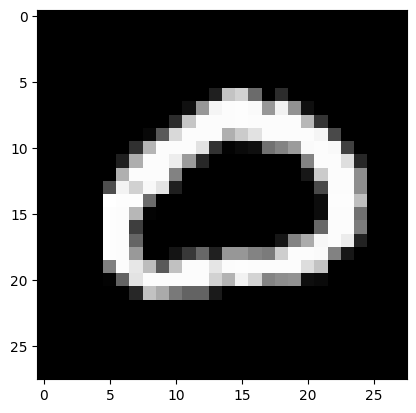

Prediction:  [0]
Label:  8


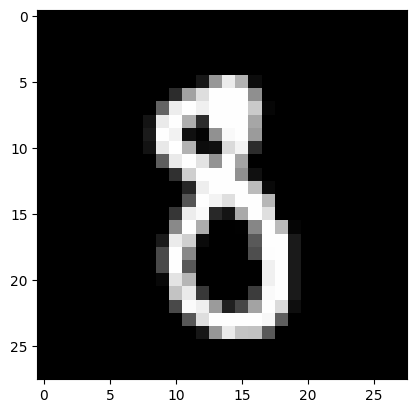

Prediction:  [0]
Label:  6


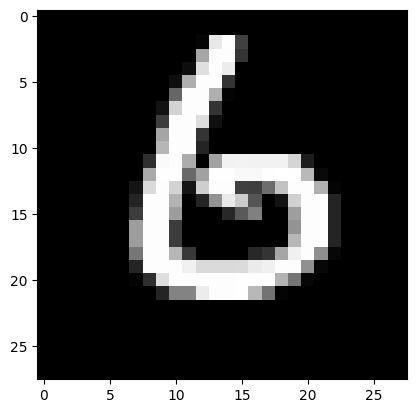

Prediction:  [0]
Label:  9


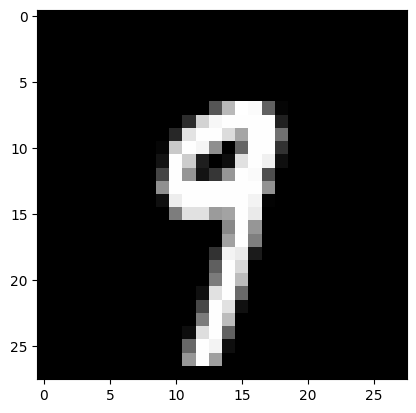

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.091